In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code

Download and load the MNIST dataset using the provided function load_data(), and:
1. Calculate pixelwise mean, variance, eigenvectors and eigenvalues.
2. Plot the mean and the first 10 eigenvector images.
3. Plot the first 100 eigenvalues.

In [ ]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt
import urllib.request

In [ ]:
def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)

    copied from http://deeplearning.net/ and revised by hchoi
    '''

    # Download the MNIST dataset if it is not present
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.
    print('... data has been loaded!')
    return train_set, valid_set, test_set

In [ ]:
#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

#Separate each set into image vector (_x) and label (_y)
train_x, train_y = train_set
val_x, val_y = val_set
test_x, test_y = test_set

Loading data...
... data has been loaded!


In [ ]:
#Check that the shapes (dimensions) of the labels make sense.
print(train_x.shape)
print(train_y.shape)
#Answer these questions to yourself: what do these dimensions mean? How many data samples are there?

(50000, 784)
(50000,)


## Mean, variance, eigenvectors and eigenvalues.

In [ ]:
#Compute the pixelwise mean of the images from train_x. Complete the ... space with your code
mean_img = train_x.mean(axis=0)
#Check the shape. It should be (784,)
print(mean_img.shape)

(784,)


In [ ]:
#Compute the pixelwise variance of the images from train_x. Complete the ... space with your code
var_img = np.var(train_x, axis=0)
#Check the shape. It should be (784,)
print(var_img.shape)

(784,)


In [ ]:
#Compute the eigenvectors and eigenvalues, complete ... with your code
#first, compute the covariance matrix of train_x (careful with the dimensions)
cov = np.cov(train_x,rowvar=False)
#Check the shape, it should be (784, 784)
print(cov.shape)
#Get the eigenvalues and eigenvectors
eigval, eigvec = np.linalg.eig(cov)
#Print their shapes
print(eigval.shape,eigvec.shape)

(784, 784)
(784,) (784, 784)


## Print the mean and the first 10 eigenvector images.

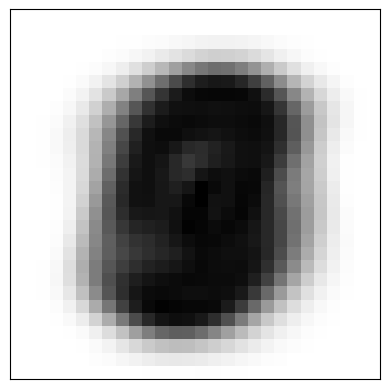

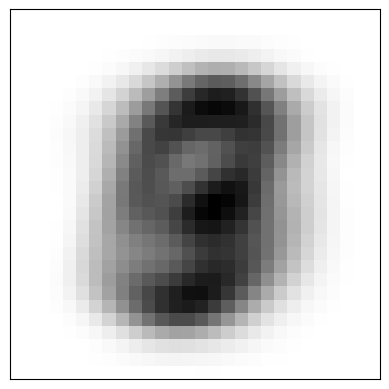

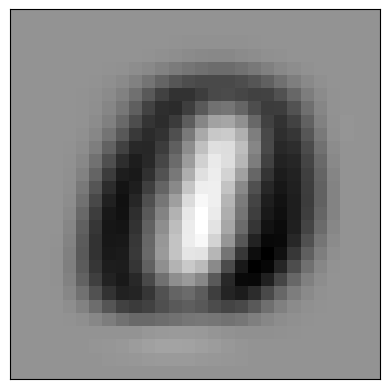

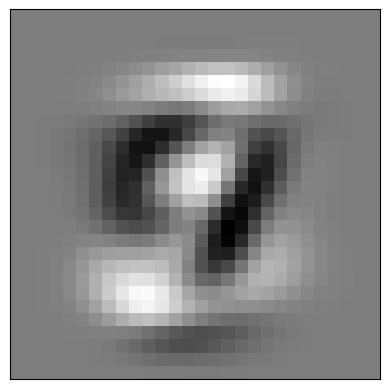

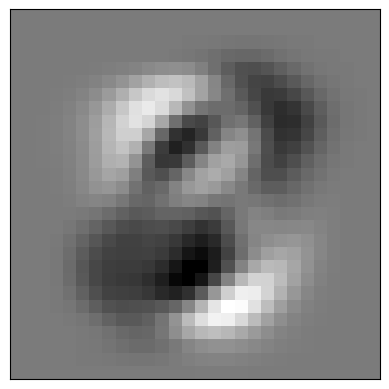

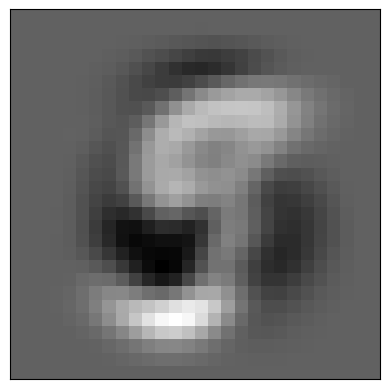

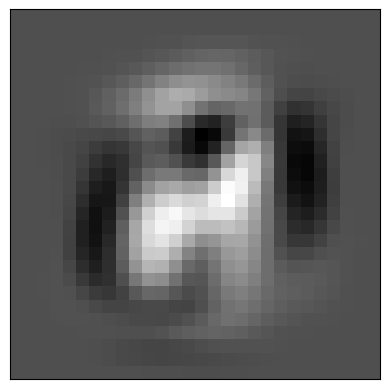

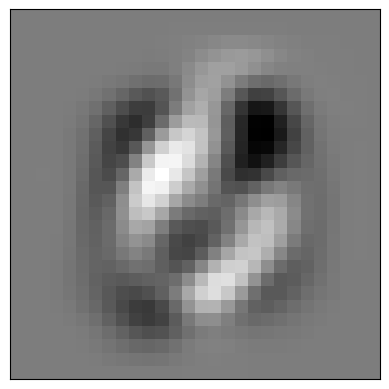

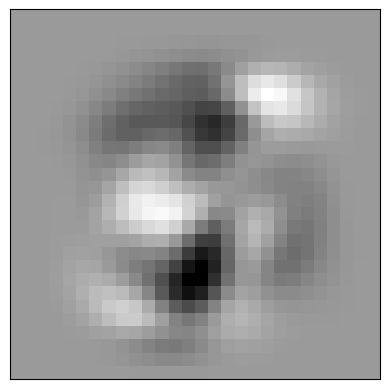

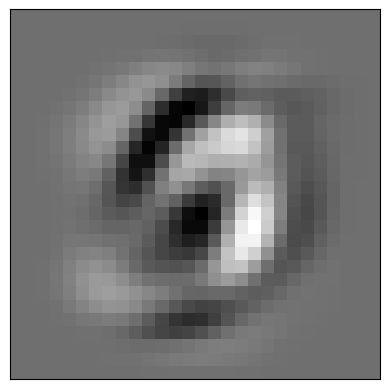

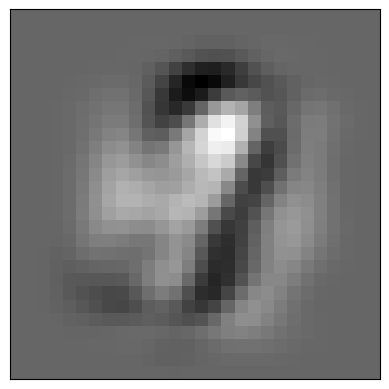

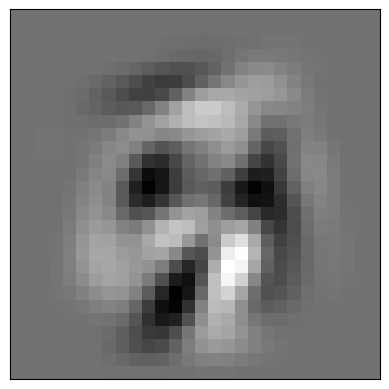

In [ ]:
#example with variance
plt.figure()
fig = plt.imshow(np.asarray(var_img).reshape(28,28),origin = 'upper')
fig.set_cmap('gray_r')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
plt.close()

#do the same with the mean
plt.figure()
fig = plt.imshow(np.asarray(mean_img).reshape(28,28),origin = 'upper')
fig.set_cmap('gray_r')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
plt.close()

#and the 10 eigenvectors
for i in range(10): #select the first 10 eigenvectors. complete the ...
  plt.figure()
  fig = plt.imshow(np.asarray(eigvec.T[i]).reshape(28,28),origin = 'upper')
  fig.set_cmap('gray_r')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  plt.show()
  plt.close()

## Plot the first 100 eigenvalues

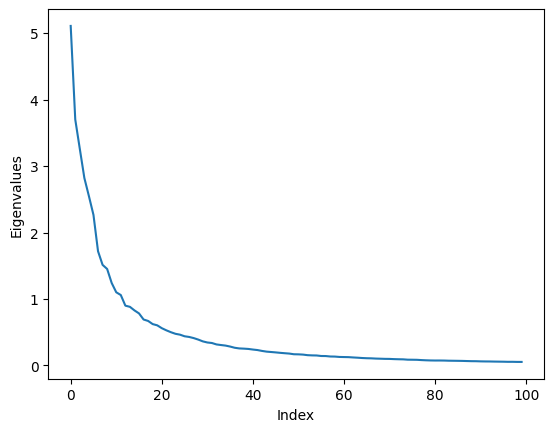

In [ ]:
#complete the ...
plt.figure()
fig = plt.plot(np.asarray(eigval[range(100)]))
plt.xlabel('Index')
plt.ylabel('Eigenvalues')
plt.show()
plt.close()

# Report

Answer the following questions.

1.   Why do we need to compute the covariance matrix in order to get the eigenvalues and eigenvectors?
2.   What do you think the eigenvector images capture? And the eigenvalues?
3.  Does the pixelwise mean and variance have any informative value about the dataset? In which other way can you compute the mean and variance of the dataset that would provide some characterization of the dataset?
4.   Conclude with some thoughts and things you learned from this homework.


1. Covarience matrix is the matrix that represent the relation btween data so that it can show how much the data are corelated. The eigen vector of largest eigen value is the vector that shows largest varience in the data. So that it can be used for data projection and other computation. If it's not from covarience matrix, the eigen vector cannot represent the data's major patterns.

2. The eigenvector images capture the major pattern of data. The eigenvalues captures the size of the eigenvector which can be seen as the varience size of the data for the pattern.

3. Pixelwise mean shows mean value of cirtain pixel from whole images, and variance shows the variance of cirtain pixel from whole images. One other way to compute mean and variance might be pixelwise plus labelwise. Compute pixelwise mean and varience but only data with same label. It can show the significance of each label data.

4. I learned what is varience and the relation between covarience and eigen vectors, and complexity of data analysis, and the meaning of visualization of each concept.